In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.4.1
2.4.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# load data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

* Podzielmy pełny zestaw treningowy na zestaw walidacyjny i zestaw treningowy. 
* Kolor pikseli skalujemy również do zakresu 0-1 i przekształcamy na zmiennoprzecinkowe, dzieląc przez 255.

In [5]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

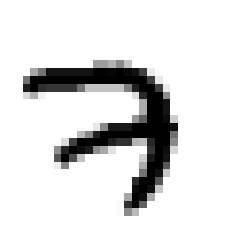

In [6]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

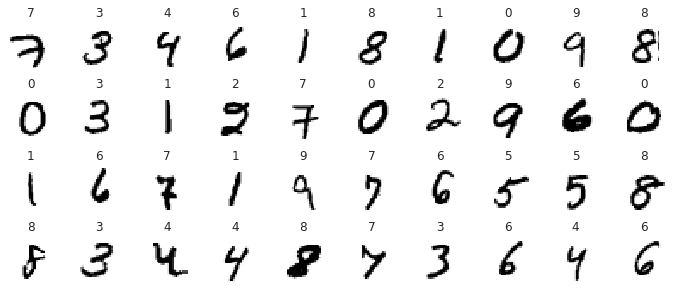

In [7]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [8]:
from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

y_valid = np_utils.to_categorical(y_valid)

print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


Using TensorFlow backend.


# Zad
Zbuduj i naucz sieć neuronową zgodnie z poniższym schematem. 

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Flatten())
model.add(Dense(300,activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))


model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

from tensorflow.keras.callbacks import History

history = History()
model = Sequential()
model.add(Flatten())
model.add(Dense(300,activation="sigmoid", input_shape=(X_train.shape[1],)))
model.add(Dense(100,activation="sigmoid"))
model.add(Dense(10,activation="sigmoid"))

model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

# model.summary()

history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32, epochs=3)
#
# pd.DataFrame(history.history).plot(figsize=(8, 5))
# plt.grid(True)
# plt.gca().set_ylim(0, 1)
# plt.show()

Epoch 1/3


ValueError: in user code:

    /home/zyndram/anaconda3/envs/podstawy_sztucznej_inteligencji/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /home/zyndram/anaconda3/envs/podstawy_sztucznej_inteligencji/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/zyndram/anaconda3/envs/podstawy_sztucznej_inteligencji/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/zyndram/anaconda3/envs/podstawy_sztucznej_inteligencji/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/zyndram/anaconda3/envs/podstawy_sztucznej_inteligencji/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/zyndram/anaconda3/envs/podstawy_sztucznej_inteligencji/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /home/zyndram/anaconda3/envs/podstawy_sztucznej_inteligencji/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:758 train_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    /home/zyndram/anaconda3/envs/podstawy_sztucznej_inteligencji/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:408 update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    /home/zyndram/anaconda3/envs/podstawy_sztucznej_inteligencji/lib/python3.8/site-packages/tensorflow/python/keras/utils/metrics_utils.py:90 decorated
        update_op = update_state_fn(*args, **kwargs)
    /home/zyndram/anaconda3/envs/podstawy_sztucznej_inteligencji/lib/python3.8/site-packages/tensorflow/python/keras/metrics.py:177 update_state_fn
        return ag_update_state(*args, **kwargs)
    /home/zyndram/anaconda3/envs/podstawy_sztucznej_inteligencji/lib/python3.8/site-packages/tensorflow/python/keras/metrics.py:618 update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/zyndram/anaconda3/envs/podstawy_sztucznej_inteligencji/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/zyndram/anaconda3/envs/podstawy_sztucznej_inteligencji/lib/python3.8/site-packages/tensorflow/python/keras/metrics.py:3307 sparse_categorical_accuracy
        y_true = array_ops.squeeze(y_true, [-1])
    /home/zyndram/anaconda3/envs/podstawy_sztucznej_inteligencji/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/zyndram/anaconda3/envs/podstawy_sztucznej_inteligencji/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py:538 new_func
        return func(*args, **kwargs)
    /home/zyndram/anaconda3/envs/podstawy_sztucznej_inteligencji/lib/python3.8/site-packages/tensorflow/python/ops/array_ops.py:4379 squeeze
        return gen_array_ops.squeeze(input, axis, name)
    /home/zyndram/anaconda3/envs/podstawy_sztucznej_inteligencji/lib/python3.8/site-packages/tensorflow/python/ops/gen_array_ops.py:10172 squeeze
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    /home/zyndram/anaconda3/envs/podstawy_sztucznej_inteligencji/lib/python3.8/site-packages/tensorflow/python/framework/op_def_library.py:748 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    /home/zyndram/anaconda3/envs/podstawy_sztucznej_inteligencji/lib/python3.8/site-packages/tensorflow/python/framework/func_graph.py:590 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    /home/zyndram/anaconda3/envs/podstawy_sztucznej_inteligencji/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:3528 _create_op_internal
        ret = Operation(
    /home/zyndram/anaconda3/envs/podstawy_sztucznej_inteligencji/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:2015 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    /home/zyndram/anaconda3/envs/podstawy_sztucznej_inteligencji/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:1856 _create_c_op
        raise ValueError(str(e))

    ValueError: Can not squeeze dim[1], expected a dimension of 1, got 10 for '{{node Squeeze}} = Squeeze[T=DT_FLOAT, squeeze_dims=[-1]](IteratorGetNext:1)' with input shapes: [?,10].


In [1]:
model.evaluate(X_test, y_test)

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(np.argmax(y_proba[index]), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()